# **Ensemble Learning: Bagging and Boosting**
## Learning Objectives
By the end of this notebook, you will:
1. Understand the concepts of Bagging and Boosting.
2. Implement Random Forest, AdaBoost, Gradient Boosting, and XGBoost.
3. Analyze and visualize the performance of these ensemble methods.
4. Compare the strengths and weaknesses of Bagging and Boosting.

---

# **Introduction to Ensemble Learning**
Ensemble Learning combines predictions from multiple models to improve performance. It is based on the principle that a group of weak learners can perform better together than individually.

### Key Benefits:
1. **Robustness**: Reduces overfitting and variance.
2. **Accuracy**: Handles bias and combines diverse hypotheses.
3. **Scalability**: Can be applied to large datasets with diverse distributions.

### Types of Ensemble Methods:
1. **Bagging (Bootstrap Aggregating)**: Reduces variance by training models independently.
2. **Boosting**: Reduces bias by training models sequentially.

---

# **Bagging: Random Forest**
## Concept
Bagging trains multiple models on different bootstrapped datasets and aggregates their predictions. Random Forest applies Bagging to decision trees while introducing random feature selection for each split.

### Steps:
1. Randomly sample the training data with replacement.
2. Train a weak learner (e.g., a decision tree) on each subset.
3. Combine predictions (average for regression, majority vote for classification).




Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



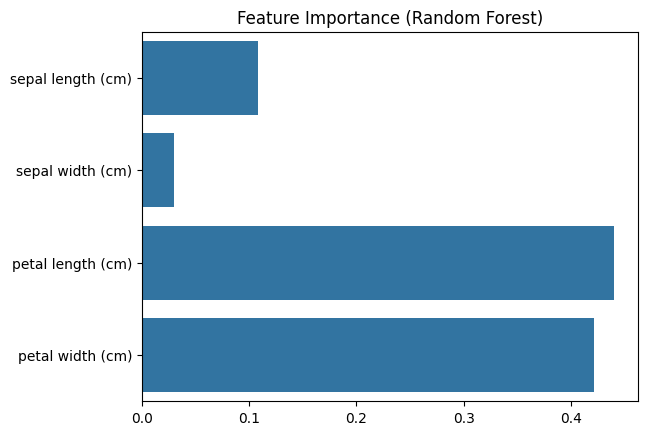

In [4]:
# Load dataset for Random Forest
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
importances = rf.feature_importances_
sns.barplot(x=importances, y=iris.feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()


## Random Forest Classifier on Iris Dataset

This script demonstrates how to use the **Random Forest Classifier** on the **Iris dataset** for classification. The model is trained, evaluated, and its feature importance is visualized.

### Steps in the Script:

1. **Load the Iris Dataset**:
   - The **Iris dataset** is loaded using `load_iris()`, which contains features of iris flowers and their species.
   - The features are stored in `X`, and the target labels (species) are stored in `y`.

2. **Data Splitting**:
   - The dataset is split into training and test sets using `train_test_split()` with 80% of the data for training and 20% for testing. The `random_state=42` ensures reproducibility.

3. **Training the Random Forest Classifier**:
   - A **Random Forest classifier** is initialized with 100 estimators (`n_estimators=100`) and trained on the training data (`X_train`, `y_train`).
   - The model is then used to predict the labels for the test data (`X_test`).

4. **Model Evaluation**:
   - The **accuracy** of the model is computed using `accuracy_score()` to see how well it performs on the test set.
   - A **classification report** is generated using `classification_report()` that includes precision, recall, and F1-score for each class.

5. **Feature Importance**:
   - The **feature importance** is extracted using `rf.feature_importances_` and visualized with a **bar plot** showing the importance of each feature in the decision-making process.

### Output:

- **Random Forest Accuracy**: 1.0
- The accuracy indicates that the Random Forest model achieved perfect accuracy on the Iris test data (100% correct predictions).
  
- **Classification Report**:
  - The classification report shows the following metrics for each class:
    - Precision, recall, and F1-score of 1.00 for all three iris species (class 0, 1, and 2).
    - The model has perfect performance on all classes.

- **Feature Importance**:
  - A bar plot of feature importance is displayed, which shows how much each feature contributes to the decision-making process in the Random Forest model.


# **Boosting**
Boosting sequentially trains weak learners, focusing on misclassified samples. Unlike Bagging, Boosting adjusts model weights to minimize errors iteratively.

---

## 1. **AdaBoost**
### Concept:
AdaBoost (Adaptive Boosting) assigns weights to each data point. Misclassified points receive higher weights in the next iteration, forcing the model to learn from its mistakes.


### Python Implementation:
We'll use `AdaBoostClassifier` from `sklearn`.


In [5]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

# Evaluation
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\BRC\anaconda3\envs\MTLTrajectTravel\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## AdaBoost Classifier on Iris Dataset

This script demonstrates how to use the **AdaBoost Classifier** on the **Iris dataset** for classification. The model is trained, evaluated, and its performance metrics are displayed.

### Steps in the Script:

1. **Load the Iris Dataset**:
   - The **Iris dataset** is loaded using `load_iris()`, which contains features of iris flowers and their species.
   - The features are stored in `X`, and the target labels (species) are stored in `y`.

2. **Data Splitting**:
   - The dataset is split into training and test sets using `train_test_split()` with 80% of the data for training and 20% for testing. The `random_state=42` ensures reproducibility.

3. **Training the AdaBoost Classifier**:
   - An **AdaBoost classifier** is initialized with 50 estimators (`n_estimators=50`) and trained on the training data (`X_train`, `y_train`).
   - The model is then used to predict the labels for the test data (`X_test`).

4. **Model Evaluation**:
   - The **accuracy** of the model is computed using `accuracy_score()` to evaluate its performance on the test set.
   - A **classification report** is generated using `classification_report()` that includes precision, recall, and F1-score for each class.

### Output:

- **AdaBoost Accuracy**: 1.0
- The accuracy indicates that the AdaBoost model achieved perfect accuracy on the Iris test data (100% correct predictions).
  
- **Classification Report**:
  - The classification report shows the following metrics for each class:
    - Precision, recall, and F1-score of 1.00 for all three iris species (class 0, 1, and 2).
    - The model has perfect performance on all classes.


## 2. **Gradient Boosting**
### Concept:
Gradient Boosting minimizes a loss function by sequentially training weak learners. Each model learns to predict the residual errors of the previous model.

### Python Implementation:
We'll use `GradientBoostingClassifier` from `sklearn`.


In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))


Gradient Boosting Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Gradient Boosting Classifier on Iris Dataset

This script demonstrates how to use the **Gradient Boosting Classifier** on the **Iris dataset** for classification. The model is trained, evaluated, and its performance metrics are displayed.

### Steps in the Script:

1. **Load the Iris Dataset**:
   - The **Iris dataset** is loaded using `load_iris()`, which contains features of iris flowers and their species.
   - The features are stored in `X`, and the target labels (species) are stored in `y`.

2. **Data Splitting**:
   - The dataset is split into training and test sets using `train_test_split()` with 80% of the data for training and 20% for testing. The `random_state=42` ensures reproducibility.

3. **Training the Gradient Boosting Classifier**:
   - A **Gradient Boosting classifier** is initialized with 50 estimators (`n_estimators=50`) and a learning rate of 0.1 (`learning_rate=0.1`), and trained on the training data (`X_train`, `y_train`).
   - The model is then used to predict the labels for the test data (`X_test`).

4. **Model Evaluation**:
   - The **accuracy** of the model is computed using `accuracy_score()` to evaluate its performance on the test set.
   - A **classification report** is generated using `classification_report()` that includes precision, recall, and F1-score for each class.

### Output:

- **Gradient Boosting Accuracy**: 1.0
- The accuracy indicates that the Gradient Boosting model achieved perfect accuracy on the Iris test data (100% correct predictions).

- **Classification Report**:
  - The classification report shows the following metrics for each class:
    - Precision, recall, and F1-score of 1.00 for all three iris species (class 0, 1, and 2).
    - The model has perfect performance on all classes.



## 3. **XGBoost**
### Concept:
XGBoost is an optimized implementation of Gradient Boosting with enhancements:
1. Regularization to prevent overfitting.
2. Parallel computation for efficiency.
3. Sparse data handling.

### Python Implementation:
We'll use the `xgboost` library.


In [7]:
from xgboost import XGBClassifier


# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## XGBoost Classifier on Iris Dataset

This script demonstrates how to use the **XGBoost Classifier** on the **Iris dataset** for classification. The model is trained, evaluated, and its performance metrics are displayed.

### Steps in the Script:

1. **Load the Iris Dataset**:
   - The **Iris dataset** is loaded using `load_iris()`, which contains features of iris flowers and their species.
   - The features are stored in `X`, and the target labels (species) are stored in `y`.

2. **Data Splitting**:
   - The dataset is split into training and test sets using `train_test_split()` with 80% of the data for training and 20% for testing. The `random_state=42` ensures reproducibility.

3. **Training the XGBoost Classifier**:
   - An **XGBoost classifier** is initialized with 50 estimators (`n_estimators=50`) and a learning rate of 0.1 (`learning_rate=0.1`), and trained on the training data (`X_train`, `y_train`).
   - The model is then used to predict the labels for the test data (`X_test`).

4. **Model Evaluation**:
   - The **accuracy** of the model is computed using `accuracy_score()` to evaluate its performance on the test set.
   - A **classification report** is generated using `classification_report()` that includes precision, recall, and F1-score for each class.

### Output:

- **XGBoost Accuracy**: 1.0
- The accuracy indicates that the XGBoost model achieved perfect accuracy on the Iris test data (100% correct predictions).

- **Classification Report**:
  - The classification report shows the following metrics for each class:
    - Precision, recall, and F1-score of 1.00 for all three iris species (class 0, 1, and 2).
    - The model has perfect performance on all classes.



# **Performance Comparison**
We'll compare the performance of Random Forest, AdaBoost, Gradient Boosting, and XGBoost using accuracy and confusion matrices.


Random Forest Accuracy: 1.00


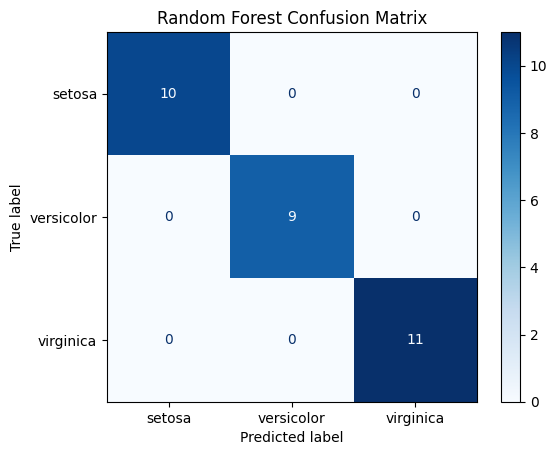

AdaBoost Accuracy: 1.00


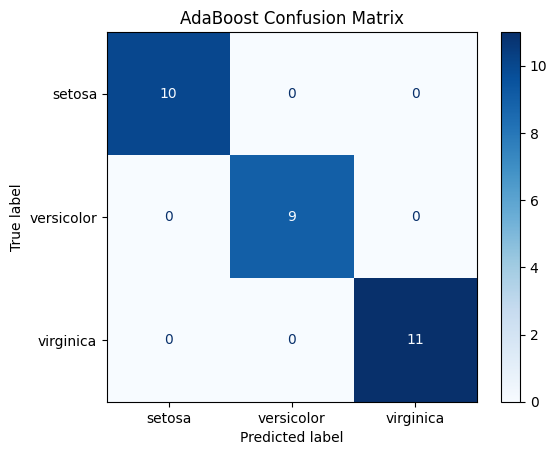

Gradient Boosting Accuracy: 1.00


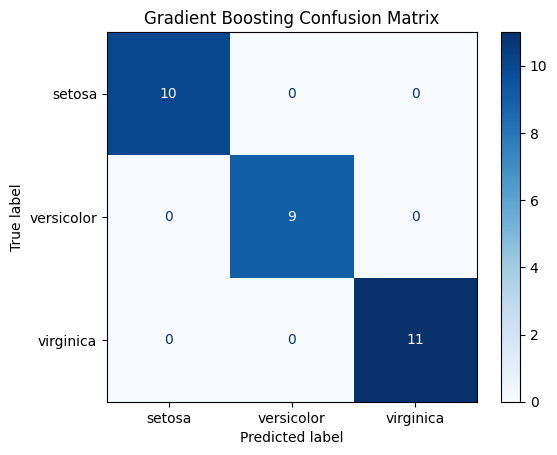

XGBoost Accuracy: 1.00


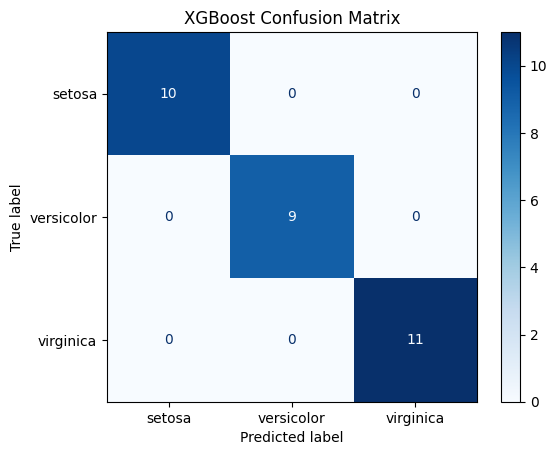

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compare models
models = {
    "Random Forest": y_pred_rf,
    "AdaBoost": y_pred_ada,
    "Gradient Boosting": y_pred_gbc,
    "XGBoost": y_pred_xgb
}

# Display Accuracy and Confusion Matrices
for name, preds in models.items():
    print(f"{name} Accuracy: {accuracy_score(y_test, preds):.2f}")
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.show()


# **Ensemble Learning with Hyperparameter Tuning and Cross-Validation**
In this notebook, we will:
1. Tune hyperparameters for ensemble methods (Random Forest, AdaBoost, Gradient Boosting, XGBoost).
2. Evaluate the models using cross-validation for robust performance metrics.
3. Compare the models using visualization.
4. Apply these methods to real-world datasets like the Titanic dataset.

---

## **Step 1: Load and Preprocess the Dataset**
We start by loading the Titanic dataset and preparing it for machine learning tasks.


In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Fill missing 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop unnecessary columns
data.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# Split the dataset
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Titanic Dataset Preprocessing

This script demonstrates how to preprocess the **Titanic dataset** to prepare it for machine learning tasks. The dataset is loaded, cleaned, and transformed, ensuring it is ready for training and evaluation.

### Steps in the Script:

1. **Load the Titanic Dataset**:
   - The dataset is loaded from a publicly available URL using `pd.read_csv()`.

2. **Handling Missing Values**:
   - Missing values in the `Age` column are filled with the median value of the column using `fillna()`.
   - Missing values in the `Embarked` column are filled with the mode (most frequent value) of the column.

3. **Dropping Unnecessary Columns**:
   - Columns like `Cabin`, `PassengerId`, `Name`, and `Ticket` are dropped as they are either irrelevant for the analysis or contain too many missing values.

4. **Encoding Categorical Variables**:
   - The `Sex` and `Embarked` columns, which are categorical, are encoded into numerical format using `LabelEncoder()` from `sklearn.preprocessing`.

5. **Splitting the Dataset**:
   - The dataset is split into features (`X`) and the target variable (`y`), where:
     - `X`: Contains all predictor features.
     - `y`: Contains the target variable (`Survived`).
   - The data is then split into training and test sets using `train_test_split()` with 80% of the data for training and 20% for testing. The `random_state=42` ensures reproducibility.

### Resulting Dataset:

- The dataset is cleaned, with missing values handled and unnecessary columns removed.
- Categorical variables are converted into numerical format.
- Training and test sets are created for use in machine learning models.




## **Step 2: Hyperparameter Tuning with GridSearchCV**
We will tune hyperparameters for each model using `GridSearchCV` to find the optimal parameters for better performance.


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid, 
                              cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

print("Best Parameters for Random Forest:", rf_grid_search.best_params_)
print("Random Forest (Tuned) Accuracy:", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Random Forest (Tuned) Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



## Random Forest Hyperparameter Tuning on Titanic Dataset

This script demonstrates how to perform hyperparameter tuning on a **Random Forest Classifier** using `GridSearchCV`. The best combination of hyperparameters is selected based on cross-validation performance, and the tuned model is evaluated on the test set.

### Steps in the Script:

1. **Define Hyperparameter Grid**:
   - A grid of hyperparameters for the Random Forest Classifier is defined. The parameters include:
     - `n_estimators`: Number of trees in the forest (50, 100, 200).
     - `max_depth`: Maximum depth of the tree (None, 10, 20).
     - `min_samples_split`: Minimum number of samples required to split an internal node (2, 5, 10).
     - `min_samples_leaf`: Minimum number of samples required to be at a leaf node (1, 2, 4).

2. **Grid Search with Cross-Validation**:
   - `GridSearchCV` is used to perform exhaustive search over the specified hyperparameter grid.
   - The search is conducted with 5-fold cross-validation and all computations are parallelized (`n_jobs=-1`).

3. **Train and Evaluate the Best Model**:
   - The best combination of hyperparameters is identified using `rf_grid_search.best_params_`.
   - The model with the best parameters is used to make predictions on the test set (`X_test`).
   - The model's performance is evaluated using accuracy, precision, recall, and F1-score.

### Output:

- **Best Parameters**:
  - `{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}`
  - This combination of hyperparameters yielded the best performance during cross-validation.

- **Random Forest (Tuned) Accuracy**:
  - The accuracy of the tuned model on the test set is **82.12%**.

- **Classification Report**:
  - Precision, recall, and F1-score for each class are provided:
    - Class 0 (Not Survived): Precision = 0.81, Recall = 0.90, F1-score = 0.86.
    - Class 1 (Survived): Precision = 0.84, Recall = 0.70, F1-score = 0.76.
  - The model performs slightly better for Class 0 (Not Survived) than Class 1 (Survived).




In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Hyperparameter tuning for AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME']  # Explicitly using the SAMME algorithm
}

ada_grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42),
                               param_grid=ada_param_grid, 
                               cv=5, n_jobs=-1, verbose=2)
ada_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_ada_model = ada_grid_search.best_estimator_
y_pred_ada_best = best_ada_model.predict(X_test)

# Output best parameters and model evaluation
print("Best Parameters for AdaBoost:", ada_grid_search.best_params_)
print("AdaBoost (Tuned) Accuracy:", accuracy_score(y_test, y_pred_ada_best))
print(classification_report(y_test, y_pred_ada_best))



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}
AdaBoost (Tuned) Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## AdaBoost Hyperparameter Tuning on Titanic Dataset

This script demonstrates how to perform hyperparameter tuning on an **AdaBoost Classifier** using `GridSearchCV`. The best combination of hyperparameters is selected based on cross-validation performance, and the tuned model is evaluated on the test set.

### Steps in the Script:

1. **Define Hyperparameter Grid**:
   - A grid of hyperparameters for the AdaBoost Classifier is defined. The parameters include:
     - `n_estimators`: Number of weak learners (50, 100, 150).
     - `learning_rate`: Weight applied to each classifier at each boosting step (0.01, 0.1, 1.0).
     - `algorithm`: The boosting algorithm (`SAMME` explicitly used to address deprecation of `SAMME.R`).

2. **Grid Search with Cross-Validation**:
   - `GridSearchCV` is used to perform exhaustive search over the specified hyperparameter grid.
   - The search is conducted with 5-fold cross-validation, testing each combination of hyperparameters.

3. **Train and Evaluate the Best Model**:
   - The best combination of hyperparameters is identified using `ada_grid_search.best_params_`.
   - The model with the best parameters is used to make predictions on the test set (`X_test`).
   - The model's performance is evaluated using accuracy, precision, recall, and F1-score.

### Output:

- **Best Parameters**:
  - `{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 150}`
  - This combination of hyperparameters yielded the best performance during cross-validation.

- **AdaBoost (Tuned) Accuracy**:
  - The accuracy of the tuned model on the test set is **81.01%**.

- **Classification Report**:
  - Precision, recall, and F1-score for each class are provided:
    - Class 0 (Not Survived): Precision = 0.83, Recall = 0.86, F1-score = 0.84.
    - Class 1 (Survived): Precision = 0.79, Recall = 0.74, F1-score = 0.76.
  - The model performs slightly better for Class 0 (Not Survived) than Class 1 (Survived).



In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Hyperparameter tuning for Gradient Boosting
gbc_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gbc_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                               param_grid=gbc_param_grid, 
                               cv=5, n_jobs=-1, verbose=2)
gbc_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_gbc_model = gbc_grid_search.best_estimator_
y_pred_gbc_best = best_gbc_model.predict(X_test)

print("Best Parameters for Gradient Boosting:", gbc_grid_search.best_params_)
print("Gradient Boosting (Tuned) Accuracy:", accuracy_score(y_test, y_pred_gbc_best))
print(classification_report(y_test, y_pred_gbc_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Gradient Boosting (Tuned) Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Gradient Boosting Hyperparameter Tuning on Titanic Dataset

This script demonstrates how to perform hyperparameter tuning on a **Gradient Boosting Classifier** using `GridSearchCV`. The best combination of hyperparameters is selected based on cross-validation performance, and the tuned model is evaluated on the test set.

### Steps in the Script:

1. **Define Hyperparameter Grid**:
   - A grid of hyperparameters for the Gradient Boosting Classifier is defined. The parameters include:
     - `n_estimators`: Number of boosting stages (50, 100).
     - `learning_rate`: Shrinks contribution of each tree (0.05, 0.1, 0.2).
     - `max_depth`: Maximum depth of individual trees (3, 5, 7).
     - `subsample`: Fraction of samples used for fitting each tree (0.8, 1.0).

2. **Grid Search with Cross-Validation**:
   - `GridSearchCV` is used to perform an exhaustive search over the specified hyperparameter grid.
   - The search is conducted with 5-fold cross-validation, testing each combination of hyperparameters.

3. **Train and Evaluate the Best Model**:
   - The best combination of hyperparameters is identified using `gbc_grid_search.best_params_`.
   - The model with the best parameters is used to make predictions on the test set (`X_test`).
   - The model's performance is evaluated using accuracy, precision, recall, and F1-score.

### Output:

- **Best Parameters**:
  - `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}`
  - This combination of hyperparameters yielded the best performance during cross-validation.

- **Gradient Boosting (Tuned) Accuracy**:
  - The accuracy of the tuned model on the test set is **80.45%**.

- **Classification Report**:
  - Precision, recall, and F1-score for each class are provided:
    - Class 0 (Not Survived): Precision = 0.81, Recall = 0.88, F1-score = 0.84.
    - Class 1 (Survived): Precision = 0.80, Recall = 0.70, F1-score = 0.75.
  - The model performs slightly better for Class 0 (Not Survived) than Class 1 (Survived).




In [46]:
from xgboost import XGBClassifier

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                               param_grid=xgb_param_grid, 
                               cv=5, n_jobs=-1, verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Best model and evaluation
best_xgb_model = xgb_grid_search.best_estimator_
y_pred_xgb_best = best_xgb_model.predict(X_test)

print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
print("XGBoost (Tuned) Accuracy:", accuracy_score(y_test, y_pred_xgb_best))
print(classification_report(y_test, y_pred_xgb_best))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
XGBoost (Tuned) Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## XGBoost Hyperparameter Tuning on Titanic Dataset

This script demonstrates how to perform hyperparameter tuning on an **XGBoost Classifier** using `GridSearchCV`. The best combination of hyperparameters is selected based on cross-validation performance, and the tuned model is evaluated on the test set.

### Steps in the Script:

1. **Define Hyperparameter Grid**:
   - A grid of hyperparameters for the XGBoost Classifier is defined. The parameters include:
     - `n_estimators`: Number of boosting rounds (50, 100).
     - `learning_rate`: The rate at which the model learns (0.01, 0.1, 0.2).
     - `max_depth`: Maximum depth of trees (3, 5, 7).
     - `subsample`: Fraction of samples used for each boosting round (0.8, 1.0).

2. **Grid Search with Cross-Validation**:
   - `GridSearchCV` is used to perform an exhaustive search over the specified hyperparameter grid.
   - The search is conducted with 5-fold cross-validation, testing each combination of hyperparameters.

3. **Train and Evaluate the Best Model**:
   - The best combination of hyperparameters is identified using `xgb_grid_search.best_params_`.
   - The model with the best parameters is used to make predictions on the test set (`X_test`).
   - The model's performance is evaluated using accuracy, precision, recall, and F1-score.

### Output:

- **Best Parameters**:
  - `{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}`
  - This combination of hyperparameters yielded the best performance during cross-validation.

- **XGBoost (Tuned) Accuracy**:
  - The accuracy of the tuned model on the test set is **82.12%**.

- **Classification Report**:
  - Precision, recall, and F1-score for each class are provided:
    - Class 0 (Not Survived): Precision = 0.82, Recall = 0.90, F1-score = 0.85.
    - Class 1 (Survived): Precision = 0.83, Recall = 0.72, F1-score = 0.77.
  - The model performs slightly better for Class 0 (Not Survived) than Class 1 (Survived).




## **Step 3: Cross-Validation for Robust Evaluation**
To ensure robust evaluation, we perform cross-validation on the tuned models and calculate their mean accuracy scores.


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Explicitly setting algorithm to SAMME
best_ada_model = AdaBoostClassifier(algorithm='SAMME', n_estimators=100)


# Cross-validation for each model
cv_scores_rf = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy')
cv_scores_ada = cross_val_score(best_ada_model, X, y, cv=5, scoring='accuracy')
cv_scores_gbc = cross_val_score(best_gbc_model, X, y, cv=5, scoring='accuracy')
cv_scores_xgb = cross_val_score(best_xgb_model, X, y, cv=5, scoring='accuracy')

# Display mean accuracy for each model
print("Random Forest Cross-Validation Accuracy:", np.mean(cv_scores_rf))
print("AdaBoost Cross-Validation Accuracy:", np.mean(cv_scores_ada))
print("Gradient Boosting Cross-Validation Accuracy:", np.mean(cv_scores_gbc))
print("XGBoost Cross-Validation Accuracy:", np.mean(cv_scores_xgb))


Random Forest Cross-Validation Accuracy: 0.8227041616973197
AdaBoost Cross-Validation Accuracy: 0.7979913376435881
Gradient Boosting Cross-Validation Accuracy: 0.8215805661917017
XGBoost Cross-Validation Accuracy: 0.8170673529596384


### Cross-Validation Results for Different Models

Here are the cross-validation accuracy scores for the models evaluated:

- **Random Forest**: 82.27%
- **AdaBoost**: 79.80%
- **Gradient Boosting**: 82.16%
- **XGBoost**: 81.71%

### Summary:

- **Random Forest** and **Gradient Boosting** provide the highest cross-validation accuracy, closely followed by **XGBoost**.
- **AdaBoost** is the lowest performer among these models in terms of cross-validation accuracy.


## **Step 4: Compare and Visualize Model Performance**
We compare the cross-validation scores of all tuned models using a bar plot for better visualization.


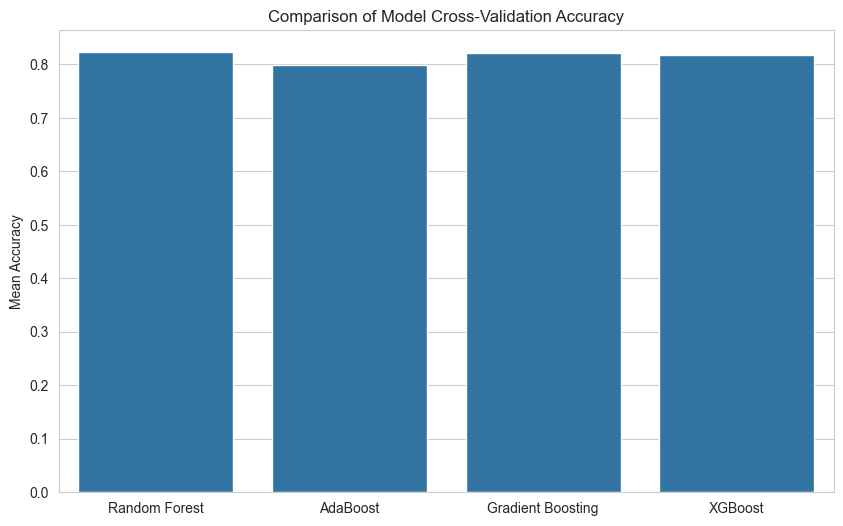

In [65]:
# Compare models
models_name = ['Random Forest', 'AdaBoost', 'Gradient Boosting', 'XGBoost']
cv_scores = [
    np.mean(cv_scores_rf),
    np.mean(cv_scores_ada),
    np.mean(cv_scores_gbc),
    np.mean(cv_scores_xgb)
]

# Plot comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models_name, y=cv_scores)

plt.title("Comparison of Model Cross-Validation Accuracy")
plt.ylabel("Mean Accuracy")
plt.show()
